# Introduction
This project aims to explore the relationship between corruption and climate by analyzing indicators such as temperature, corruption index, democracy index, and GDP for democratic nations in 2019. The data was merged and processed using the **Pandas** library, while **Seaborn** and **Matplotlib** were used for visualization. The analysis focuses on descriptive statistics, correlation, and regression.

## Motivation

This project is inspired by the noticeable differences in corruption levels across European countries. Southern European nations, such as Italy and Greece, have the reputation of being lazy and corrupt, whereas Northern European countries like Denmark and Finland are known to be organized and reliable. This study investigates the intriguing hypothesis of whether corruption is somewhat correlated to a country’s climate.

## Data Import and Setup

In [2]:
#Importing libraries
import pandas as pd   #data manipulation
import numpy as np    #matrix operations
import matplotlib.pyplot as plt #data viz
import seaborn as sns #data viz
import fuzzywuzzy   #data cleaning - matching words
from fuzzywuzzy import process
from fuzzywuzzy import fuzz

import warnings #ignoring warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#setting pandas to display full data
pd.set_option("display.max.columns", 100)
pd.set_option('display.max_rows', None) 


#Loading and storing datasets
temp=pd.read_csv('combined_temperature.csv')
cpi=pd.read_excel('CPI2019-1.xlsx',skiprows=2)
gdp=pd.read_excel('API_NY.GDP.PCAP.PP.CD_DS2_en_excel_v2_16126.xls',skiprows=3)
democracy=pd.read_excel('EIU-DI.xlsx')


## Data Preview

In [3]:
temp.head()

,Country,Year,Annual Mean,5-yr smooth,Code
0,Dominican Republic,1901,23.71,23.65,DOM
1,Dominican Republic,1902,23.40,23.52,DOM
2,Dominican Republic,1903,23.45,23.38,DOM
3,Dominican Republic,1904,23.03,23.26,DOM
4,Dominican Republic,1905,23.44,23.16,DOM


In [4]:
cpi.head()

,Country,ISO3,Region,CPI score 2019,Rank,standard error,Number of sources,Lower CI,Upper CI,African Development Bank CPIA,Bertelsmann Foundation Sustainable Governance Index,Bertelsmann Foundation Transformation Index,Economist Intelligence Unit Country Ratings,Freedom House Nations in Transit Ratings,Global Insight Country Risk Ratings,IMD World Competitiveness Yearbook,PERC Asia Risk Guide,PRS International Country Risk Guide,Varieties of Democracy Project,World Bank CPIA,World Economic Forum EOS,World Justice Project Rule of Law Index
0,Denmark,DNK,WE/EU,87,1,2.542474,8,82.83035,91.16965,NaN,97.0,NaN,90.0,NaN,83,94.0,NaN,93.0,77.0,NaN,79.0,86.0
1,New Zealand,NZL,AP,87,1,2.286490,8,83.25015,90.74985,NaN,97.0,NaN,90.0,NaN,83,83.0,NaN,93.0,77.0,NaN,89.0,82.0
2,Finland,FIN,WE/EU,86,3,2.924511,8,81.20380,90.79620,NaN,88.0,NaN,72.0,NaN,83,94.0,NaN,93.0,75.0,NaN,93.0,87.0
3,Singapore,SGP,AP,85,4,2.048400,9,81.64063,88.35938,NaN,NaN,73.0,90.0,NaN,83,91.0,89.0,85.0,77.0,NaN,89.0,85.0
4,Sweden,SWE,WE/EU,85,4,1.977693,8,81.75658,88.24342,NaN,88.0,NaN,90.0,NaN,83,84.0,NaN,93.0,78.0,NaN,77.0,87.0


In [5]:
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20754.231459,22430.060885,23485.063132,25025.671030,26786.989632,27193.507454,27184.598153,28719.349623,28743.827984,28658.071597,30750.475341,32183.510387,31990.309034,32656.818676,35658.211717,36269.711063,37365.610910,39080.887787,40064.653752,35167.874632,34232.726741,35778.491797,34762.788184,36877.014132,36763.209005,37231.918495,37444.441094,38697.949507,40379.293724,40124.757998,30437.202516,38226.146157,45236.021214,NaN
1,Africa Eastern and Southern,AFE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1816.035866,1829.114493,1787.915919,1780.641370,1804.269969,1875.227249,1962.127382,2029.932682,2039.898635,2074.866483,2140.709679,2212.601876,2276.544270,2337.163314,2470.340425,2636.264273,2822.554457,3010.620823,3122.062999,3081.051853,3190.837784,3296.369413,3211.163383,3337.142219,3473.843253,3502.296662,3595.841041,3640.628582,3695.386884,3783.518751,3666.871961,3967.400629,4294.025281,4459.764134
2,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,838.000705,770.309174,943.178748,970.716232,971.926517,1075.795355,1121.003333,1287.275315,1336.544395,1575.332126,1771.451428,1749.936995,1994.535277,2138.753060,2229.679539,2289.371986,2217.296786,2338.778697,2436.006320,2589.410396,2568.341909,2138.870247,2092.879952,NaN
3,Africa Western and Central,AFW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1741.687520,1775.459118,1810.206965,1784.326760,1774.071017,1801.226840,1870.093795,1936.507636,1977.078638,1985.346010,2049.589057,2145.260025,2317.919528,2425.473570,2613.304428,2773.001642,2927.384558,3082.080265,3247.281244,3369.782028,3544.069052,3690.539063,3806.793122,3971.199770,4180.427724,4130.736274,4072.792261,4139.387604,4272.387852,4525.091244,4503.396648,4756.308419,5156.120103,5389.580896
4,Angola,AGO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3283.471906,3316.014564,3091.484599,2330.875555,2336.587667,2654.634266,2968.839522,3133.453637,3210.303421,3221.132886,3286.358493,3388.524528,3783.142848,3839.854143,4224.139738,4836.226882,5364.965087,6057.771730,6616.768779,6471.347922,6587.408285,6700.114100,7351.760767,7566.423051,7999.826851,7127.339573,6850.384625,6998.796187,7353.349988,7533.511854,6455.119982,7414.278958,7928.641498,8040.543601


In [6]:
democracy.head()

,Economy ISO3,Economy Name,Indicator ID,Indicator,Attribute 1,Attribute 2,Attribute 3,Partner,2006,2008,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AFG,Afghanistan,EIU.DI.INDEX,EIU Democracy Index,-,-,-,-,3.06,3.02,2.48,2.48,2.48,2.48,2.77,2.77,2.55,2.55,2.97,2.85,2.85,0.32,0.32
1,AGO,Angola,EIU.DI.INDEX,EIU Democracy Index,-,-,-,-,2.41,3.35,3.32,3.32,3.35,3.35,3.35,3.35,3.40,3.62,3.62,3.72,3.66,3.37,3.96
2,ALB,Albania,EIU.DI.INDEX,EIU Democracy Index,-,-,-,-,5.91,5.91,5.86,5.81,5.67,5.67,5.67,5.91,5.91,5.98,5.98,5.89,6.08,6.11,6.41
3,ARE,United Arab Emirates,EIU.DI.INDEX,EIU Democracy Index,-,-,-,-,2.42,2.60,2.52,2.58,2.58,2.52,2.64,2.75,2.75,2.69,2.76,2.76,2.70,2.90,2.90
4,ARG,Argentina,EIU.DI.INDEX,EIU Democracy Index,-,-,-,-,6.63,6.63,6.84,6.84,6.84,6.84,6.84,7.02,6.96,6.96,7.02,7.02,6.95,6.81,6.85


## Data Cleaning and Merging

The dataframes are formatted to retain the relevant columns for this analysis: the country name and the respective indicators for each dataset (temperature, democracy index, corruption index, and GDP) for the year 2019. The columns are then renamed to ensure consistency across the datasets.

In [7]:
#selecting relevant columns from respective datasets
temp=temp.loc[temp["Year"]==2019,["Country","Annual Mean"]]
democracy=democracy[["Economy Name","2019"]]
cpi=cpi[["Country","CPI score 2019"]]
gdp=gdp[["Country Name","2019"]]

#renaming columns from respective datasets
temp.rename(columns={'Annual Mean':'temp','Country':'country'},inplace=True)
democracy.rename(columns={'2019':'demo','Economy Name':'country'},inplace=True)
gdp.rename(columns={'2019':'gdp','Country Name':'country'},inplace=True)
cpi.rename(columns={'CPI score 2019':'cpi','Country':'country'},inplace=True)


Result:

In [8]:
temp.head()

,country,temp
118,Dominican Republic,24.91
240,United States,9.73
362,Zambia,22.40
484,Vanuatu,24.37
606,Tonga,25.18


In [9]:
democracy.head()

,country,demo
0,Afghanistan,2.85
1,Angola,3.72
2,Albania,5.89
3,United Arab Emirates,2.76
4,Argentina,7.02


In [10]:
gdp.head()

,country,gdp
0,Aruba,40124.757998
1,Africa Eastern and Southern,3783.518751
2,Afghanistan,2589.410396
3,Africa Western and Central,4525.091244
4,Angola,7533.511854


In [11]:
cpi.head()

,country,cpi
0,Denmark,87
1,New Zealand,87
2,Finland,86
3,Singapore,85
4,Sweden,85


To establish a control for this analysis, the focus is on democratic countries only, defined as those with a democracy index of 6 or above according to the data source for the democracy index. A new dataframe, named "free," is created by excluding countries classified as anti-democratic.

In [12]:
#creating new df with democratic countries only (democracy index <6)
free=democracy[democracy["demo"]>=6]

To merge the data into a single dataframe, it is essential to accurately match country names. Given that the data comes from four different sources, inconsistencies in naming conventions are expected. The "free" dataframe will serve as the reference for country names in this analysis.

In [13]:
#checking the names of the countries 
free["country"].unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bulgaria',
       'Brazil', 'Botswana', 'Canada', 'Switzerland', 'Chile', 'Colombia',
       'Cabo Verde', 'Costa Rica', 'Cyprus', 'Czechia', 'Germany',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Spain', 'Estonia',
       'Finland', 'France', 'United Kingdom', 'Ghana', 'Greece', 'Guyana',
       'Hong Kong SAR, China', 'Croatia', 'Hungary', 'Indonesia', 'India',
       'Ireland', 'Iceland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Korea, Rep.', 'Sri Lanka', 'Lesotho', 'Lithuania', 'Luxembourg',
       'Latvia', 'Mexico', 'Malta', 'Mongolia', 'Mauritius', 'Malaysia',
       'Namibia', 'Netherlands', 'Norway', 'New Zealand', 'Panama',
       'Peru', 'Philippines', 'Papua New Guinea', 'Poland', 'Portugal',
       'Paraguay', 'Romania', 'Singapore', 'El Salvador', 'Serbia',
       'Suriname', 'Slovak Republic', 'Slovenia', 'Sweden', 'Thailand',
       'Timor-Leste', 'Trinidad and Tobago', 'Tunisia', 'Taiwan, China',
   

For the most part, country names are consistennt, with only 3 exceptions that can easily be adjusted manually:

In [14]:
#manually changing inconsistent country names
free.loc[free["country"]=="Hong Kong SAR, China","country"]="Hong Kong"
free.loc[free["country"]=="Taiwan, China","country"]="Taiwan"
free.loc[free["country"]=="Korea, Rep.","country"]="South Korea"

#total numbr of countries to be analysed
len(free["country"].unique())

76

Now that the reference dataframe has been standardized, the fuzzywuzzy library is used to match country names between datasets. Specifically, the **process.extractOne** function that given a string and a list of strings, returns the best match according to a similarity score from 1 to 100.

In [15]:
#function that matches country names and returns both the matched name and the score representing their resemblance 
def find_best_match(country, df):
    matched_country, score, a = process.extractOne(country, df["country"])
    return matched_country, score

# Initializing 
free.loc[:, "cpi"] = None
free.loc[:, "gdp"] = None
free.loc[:, "temp"] = None

#creating list to add the values that do not get accurately matched
fail = []

#For loop that for each country in "free" finds the best country match in cpi, gdp and temp. In case of a perfect match
#the data is merged to "free" in the row of the corresponding country. Otherwise the data is added to "fail" 
country_76 = free["country"].tolist()
for country in country_76:
    for df_name, df in [("cpi", cpi), ("gdp", gdp), ("temp", temp)]:
        matched_country, score = find_best_match(country, df)
        matched_series = df.loc[df['country'] == matched_country, df_name]

        #case where cell is empty
        if matched_series.empty:
            fail.append([country, matched_country, score,"empty"])

        
        else:
            matched_value=matched_series.values[0]
            
            #case where the match is perfect
            if score > 99:
                free.loc[free['country'] == country, df_name] = matched_value

            #cases where the score is not perfect
            else:
                fail.append([country, matched_country, score, df_name ,matched_value])


#printing the countries that failed to be matched         
print(fail)


#Sorting countries alphabetically and resetting indexes
free.sort_values(by="country", inplace=True)
free=free.reset_index(drop=True)



[['Cabo Verde', 'Cambodia', 56, 'temp', 27.99], ['Czechia', 'Chad', 68, 'cpi', 20], ['Czechia', 'Chad', 68, 'temp', 27.76], ['Hong Kong', 'Hong Kong SAR, China', 90, 'gdp', 61221.41954007013], ['Hong Kong', 'Tonga', 54, 'temp', 25.18], ['India', 'Dominican Republic', 72, 'temp', 24.91], ['Ireland', 'Iceland', 86, 'temp', 2.31], ['South Korea', 'Korea, South', 95, 'cpi', 59], ['South Korea', "Korea, Dem. People's Rep.", 86, 'gdp', nan], ['South Korea', 'Korea-', 90, 'temp', 13.03], ['Lithuania', 'Uganda', 66, 'temp', 23.33], ['Namibia', 'Zambia', 77, 'temp', 22.4], ['El Salvador', 'Andorra', 60, 'temp', 8.9], ['Slovak Republic', 'Central African Republic', 86, 'cpi', 25], ['Taiwan', 'Thailand', 71, 'gdp', 20023.445712501736], ['Taiwan', 'Thailand', 71, 'temp', 27.49], ['United States', 'United States of America', 90, 'cpi', 69]]


In [16]:
len(fail)

17

The reference dataframe "free" contains 76 countries, resulting in a total of 228 values to be allocated (one per country for each of the three indicators). Since "fail" contains only 17 entries, over 96% of the values were perfectly matched using Fuzzywuzzy, significantly saving time. The remaining failed cases were handled manually and categorized into three scenarios:
1. Countries that were accurately matched and had a high score (but not 100)
2. Countries that were not matched because of a low score
3. Countries that were not matched because either they did not exist or the value was missing

In [17]:
#Case 1:
#values copy pasted directly from "fail"

#['Hong Kong', 'Hong Kong SAR, China', 90, 'gdp', 61221.41954007013]
#['South Korea', 'Korea, South', 95, 'cpi', 59]
#['South Korea', 'Korea-', 90, 'temp', 13.03]
#['United States', 'United States of America', 90, 'cpi', 69]

free.loc[free["country"]=="Hong Kong","gdp"]=61221.42
free.loc[free["country"]=="South Korea","temp"]=13.03
free.loc[free["country"]=="South Korea","cpi"]=59
free.loc[free["country"]=="United States","cpi"]=69


In [18]:
#Case 2:
#values copy pasted from "cpi" and "gdp"
free.loc[free["country"]=="Czechia","cpi"]=56
free.loc[free["country"]=="Slovak Republic","cpi"]=50
free.loc[free["country"]=="South Korea","gdp"]=43865.041637

In [19]:
#Case 3:
#values from a new source of data

#temperature values: World Bank
free.loc[free["country"]=="Cabo Verde","temp"]=22.42
free.loc[free["country"]=="Czechia","temp"]=9.81
free.loc[free["country"]=="El Salvador","temp"]=25.5
free.loc[free["country"]=="Hong Kong","temp"]=24.5
free.loc[free["country"]=="India","temp"]=25.11
free.loc[free["country"]=="Ireland","temp"]=9.86
free.loc[free["country"]=="Lithuania","temp"]=7.4
free.loc[free["country"]=="Namibia","temp"]=20.73
free.loc[free["country"]=="Taiwan","temp"]=25.55

#gdp value: World Bank
#estimated using the nominal gdp per capita in 2019 and the gdp per capita ppp in 2023
free.loc[free["country"]=="Taiwan","gdp"]=49275


Merged data:

In [20]:
free.head()

,country,demo,cpi,gdp,temp
0,Argentina,7.02,45,23535.012751,15.19
1,Australia,9.09,77,52746.71829,22.78
2,Austria,8.29,77,60574.627103,8.46
3,Belgium,7.64,75,56621.541761,11.39
4,Botswana,7.81,61,14889.807303,22.98


In [21]:
#checking column datatypes
free.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  76 non-null     object 
 1   demo     76 non-null     float64
 2   cpi      76 non-null     object 
 3   gdp      76 non-null     object 
 4   temp     76 non-null     object 
dtypes: float64(1), object(4)
memory usage: 3.1+ KB


In [22]:
#converting data types from object to numerical
for col in ["cpi","gdp","temp"]:
    free[col]=pd.to_numeric(free[col])

print(free.dtypes)

country     object
demo       float64
cpi          int64
gdp        float64
temp       float64
dtype: object


## Data Analysis and Visualization

Firstly, the descriptive statistics for the indicators in "free" are displayed to summarize the key metrics, including mean, standard deviation, minimum, maximum, and quartiles.

In [23]:
#displaying descriptive statistics
free.describe()

,demo,cpi,gdp,temp
count,76.000000,76.000000,76.000000,76.000000
mean,7.504211,56.000000,35329.464295,16.759342
std,1.023439,17.701224,23621.104653,8.111534
min,6.020000,28.000000,2549.535277,-4.330000
25%,6.615000,40.000000,14696.646748,10.452500
50%,7.460000,55.000000,33262.001907,15.660000
75%,8.122500,73.250000,50015.288628,24.802500
max,9.870000,87.000000,121403.823719,28.190000


Histograms are generated to visualize the distributions of the selected indicators: Democracy Index, Corruption Index, GDP per capita, and Temperature. As expected, due to the limited sample size of 76 countries, the distributions appear ambiguous:

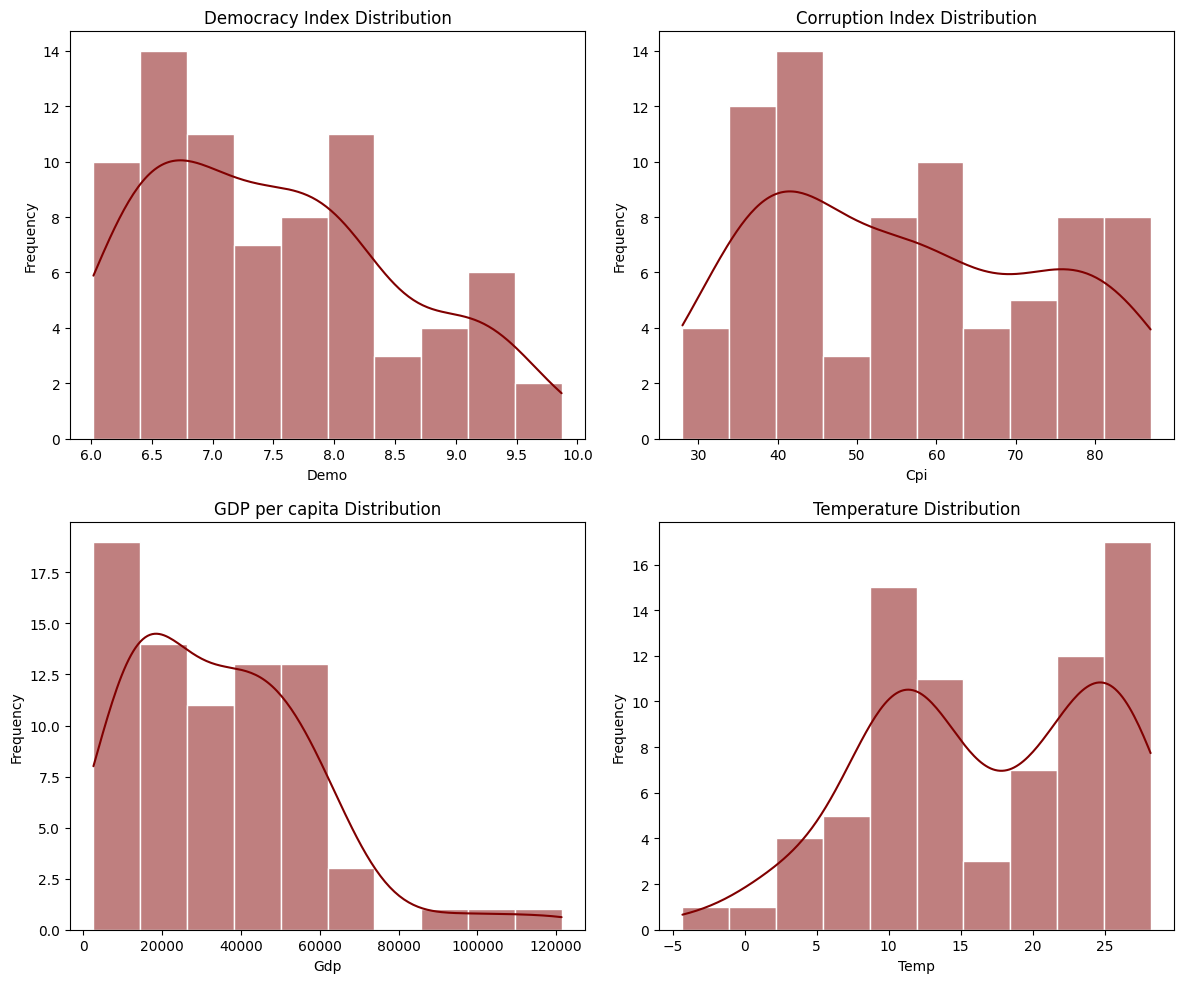

In [24]:
columns = ["demo", "cpi", "gdp", "temp"]
titles=["Democracy Index","Corruption Index", "GDP per capita", "Temperature"]

# Creating a 2x2 grid of subplots
fig, plots = plt.subplots(2, 2, figsize=(12, 10))
plots = plots.flatten()
sns.set(style="dark")
for col, plot, title in zip(columns, plots, titles):
    #sns.set(style="dark")
    sns.histplot(free[col], kde=True, bins=10, ax=plot, color="maroon")  # Plot histogram bars
    plot.set_xlabel(col.capitalize())
    plot.set_ylabel("Frequency")
    plot.set_title(f'{title} Distribution')


#fix the overlapping text
plt.tight_layout()

plt.show()

A Pearson correlation matrix is calculated to examine the relationships between the indicators. The results are displayed in a heatmap for easier visualization.

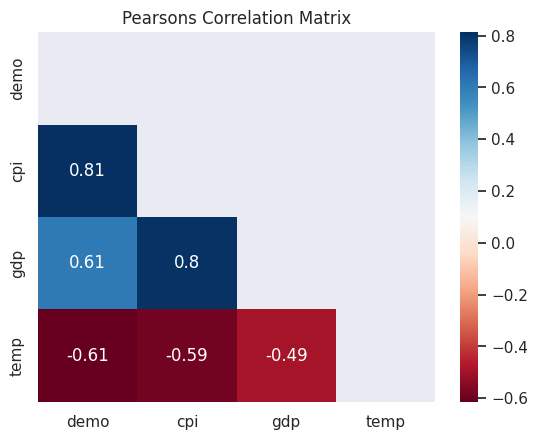

In [25]:
#Correlation matrix and heatmap
corr_matrix=free[["demo","cpi","gdp","temp"]].corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
plt.figure()
sns.heatmap(corr_matrix,annot=True,cmap="RdBu",mask=mask)
plt.title("Pearsons Correlation Matrix")
plt.show()

The analysis reveals that the most significant correlations exist between the Corruption Index and the Democracy Index (0.81) and GDP (0.80). Both of these correlations are stronger than the negative correlation observed between the Corruption Index and Temperature (-0.59).

To further investigate the relationships between the Corruption Index and other key indicators, regression analysis is conducted using both regression plots and Ordinary Least Squares (OLS) regression.

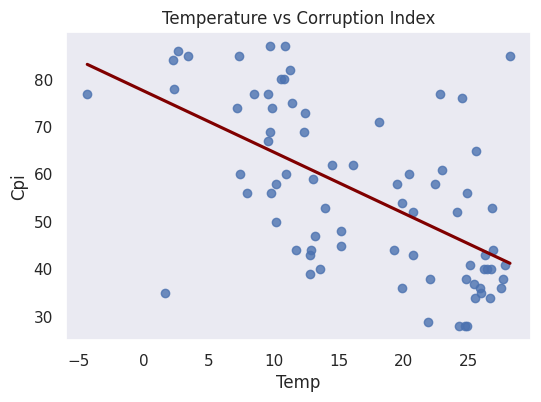

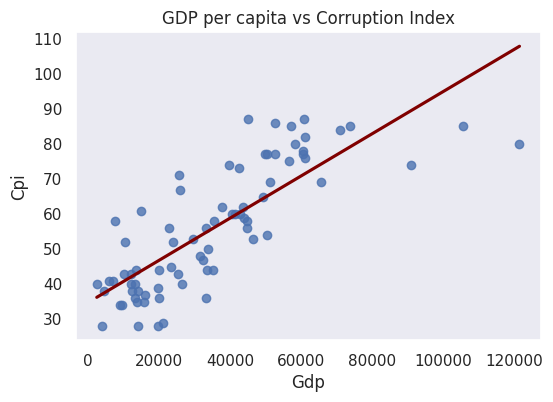

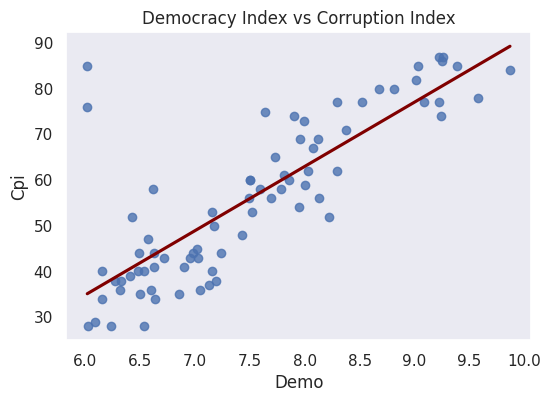

In [26]:
#orgnizing the indicator pairs for the plots
pairs = [('temp', 'cpi'),('gdp', 'cpi'),('demo', 'cpi')]

#adding titles
titles2=["Temperature","GDP per capita", "Democracy Index"]

#for-loop to create the plots
for (x, y), title in zip(pairs,titles2):
    plt.figure(figsize=(6, 4))
    sns.regplot(x=x, y=y, data=free, ci=None, line_kws={"color": "maroon"})
    plt.title(f'{title} vs {"Corruption Index"}')
    plt.xlabel(x.capitalize())
    plt.ylabel(y.capitalize())
    plt.show()


In [27]:
#importing statsmodels for conducting statistical analysis
import statsmodels.api as sm

# Independent variables
X = free[['temp', 'gdp', 'demo']]
# Dependent variable
y = free['cpi']

# Adding constant to predictor variables (intercept term)
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cpi   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     104.7
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           3.43e-26
Time:                        16:47:01   Log-Likelihood:                -261.91
No. Observations:                  76   AIC:                             531.8
Df Residuals:                      72   BIC:                             541.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.7746     10.234     -1.737      0.0

The high correlation between the corruption index and both GDP and the democracy index, along with the low correlation between corruption and temperature, is not only well illustrated in the regression plots but is also corroborated by the OLS regression results. These results reveal a strong model fit with an R-squared value of 0.814, indicating that approximately 81.4% of the variability in the corruption index is explained by the independent variables. Both GDP and the democracy index are statistically significant, with p-values of 0.000 for each, while temperature has a higher p-value of 0.401, well above the 0.05 threshold, suggesting it is not a strong predictor of corruption.


Having established the significance of democracy and GDP in predicting corruption, further analysis is conducted to explore how different levels of democracy and income influence corruption levels. 

Two new columns were added to "free" with the categorization of both democracy index and gdp:

In [28]:
#function that categorizes the democracy index based on the classification defined by the original source (Our World in Data)
def demo_categorizing(demo):
    if demo<8:
        return "Flawed Democracy"
    elif demo>=8:
        return "Full Democracy"

#creating new column on "free" with the democracy categorization 
free["demo category"]=free["demo"].apply(demo_categorizing)

In [29]:
#function that categorizes the income level based on the classification defined by the original source (World Bank)
def gdp_categorizing(gdp):
    if gdp<2500:
        return "Low Income"
    elif 2500<=gdp<12000:
        return "Lower Middle Income"
    elif 12000<=gdp<32000:
        return "Upper Middle Income"
    else:
        return "High Income"

#creating new column on "free" with the income categorization 
free["gdp category"]=free["gdp"].apply(gdp_categorizing)

#dataframe preview
free.head()

,country,demo,cpi,gdp,temp,demo category,gdp category
0,Argentina,7.02,45,23535.012751,15.19,Flawed Democracy,Upper Middle Income
1,Australia,9.09,77,52746.718290,22.78,Full Democracy,High Income
2,Austria,8.29,77,60574.627103,8.46,Full Democracy,High Income
3,Belgium,7.64,75,56621.541761,11.39,Flawed Democracy,High Income
4,Botswana,7.81,61,14889.807303,22.98,Flawed Democracy,Upper Middle Income


Descriptive statistics, specifically the mean and standard deviation, are presented again, now grouped by democracy and income categories:

In [33]:
#displaying descriptive statistics grouped by the income and democracy classification
grouped_columns=["demo","gdp","cpi"]
free.groupby(["demo category","gdp category"])[grouped_columns].agg([np.mean,np.std])

demo                     gdp  \
                                          mean       std          mean   
demo category    gdp category                                            
Flawed Democracy High Income          7.280476  0.638651  46138.044478   
                 Lower Middle Income  6.725000  0.512754   7124.553499   
                 Upper Middle Income  6.748636  0.462337  18340.537344   
Full Democracy   High Income          8.889474  0.547687  60160.717807   
                 Upper Middle Income  8.202500  0.131751  24587.339375   

                                                    
                                               std  
demo category    gdp category                       
Flawed Democracy High Income          16512.459327  
                 Lower Middle Income   2743.117730  
                 Upper Middle Income   5873.134499  
Full Democracy   High Income          19236.754349  
                 Upper Middle Income   1347.861330

To visualize the distribution of the corruption Index based on income and democracy classifications, the mean corruption index was calculated for each group and displayed on bar plots:

In [31]:
#displaying mean cpi table for each category of both demo and gdp
grouped_analysis = free.groupby(['gdp category', 'demo category']).agg({'cpi': 'mean'}).reset_index()
print(grouped_analysis)

          gdp category     demo category        cpi
0          High Income  Flawed Democracy  59.666667
1          High Income    Full Democracy  77.263158
2  Lower Middle Income  Flawed Democracy  40.900000
3  Upper Middle Income  Flawed Democracy  40.000000
4  Upper Middle Income    Full Democracy  61.500000


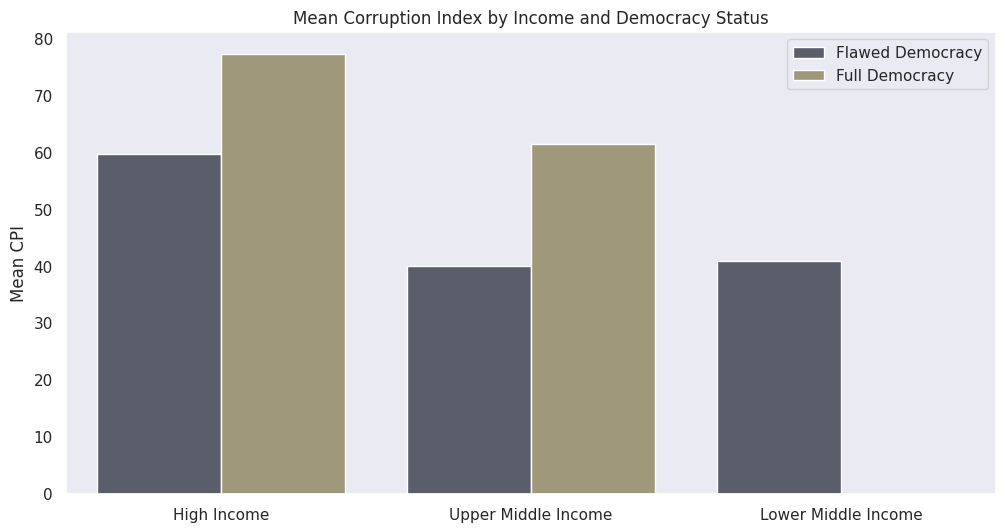

In [38]:
#creating bar plot
plt.figure(figsize=(12, 6))
gdp_order = ["High Income", "Upper Middle Income", "Lower Middle Income"]#adjusting order of columns
sns.barplot(x='gdp category', y='cpi', hue='demo category', data=grouped_analysis, palette="cividis", order=gdp_order)
plt.title('Mean Corruption Index by Income and Democracy Status')
plt.xlabel('')
plt.ylabel('Mean CPI')
plt.legend(title='')
plt.show()

The results are consistent with the regression analysis, showing that the corruption index is higher in countries with greater income levels and, within the same income group, higher for the fully democratic countries.